In [1]:
!pip install requests

In [15]:
pwd()

'/home/jovyan/projectDir'

In [28]:
import os
test_dir = '/home/jovyan/projectDir/test_data'
classes = ["velvet leaf", "cotton"]
test_filenames = [file_name for file_name in os.listdir(test_dir) if file_name.endswith("JPG")]
test_filenames

['vl_6.JPG', 'vl_1.JPG', 'vl_4.JPG', 'vl_5.JPG', 'vl_2.JPG', 'vl_3.JPG']

In [4]:
import requests
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
from PIL import Image
import json

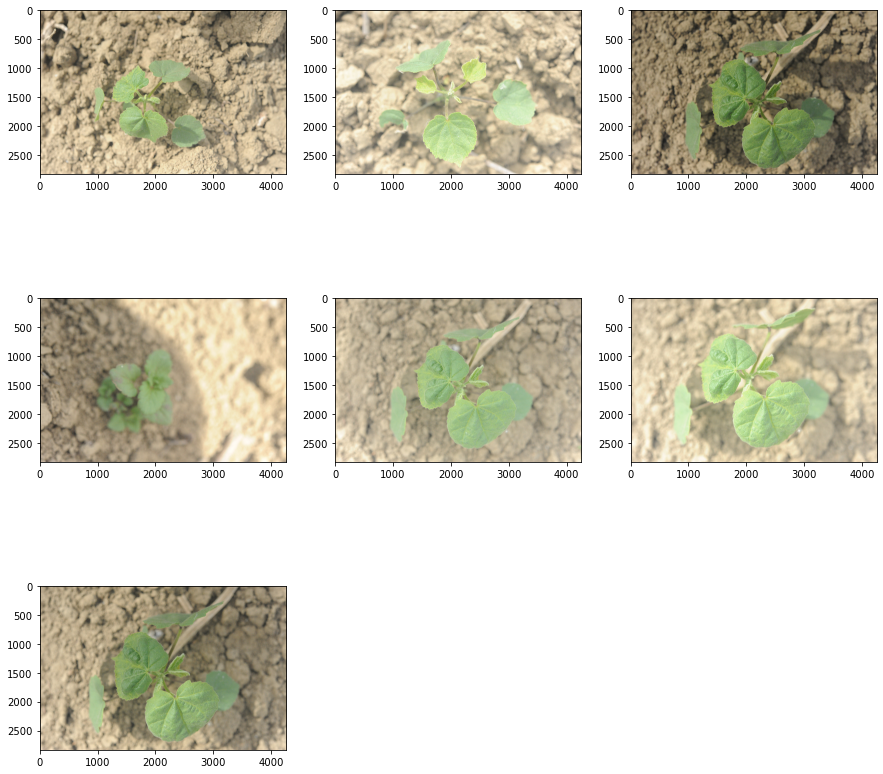

In [22]:
test_data = []

plt.figure(figsize=(15,15))
for idx,img in enumerate(test_filenames):
    ax = plt.subplot(2,3,idx+1)
    data = Image.open(f'test_data/{img}')
    plt.imshow(data)
    test_data.append(np.array(data.resize((128,128)))/255.0)

In [23]:
test_data[0].shape

(128, 128, 3)

In [24]:
tf_service_host = 'tf_weed_classifier_service'
model_name = 'cotton_model'
REST_API_port = '8501'
model_predict_url = 'http://'+tf_service_host+':'+REST_API_port+'/v1/models/'+model_name+':predict'
model_predict_url

'http://tf_weed_classifier_service:8501/v1/models/cotton_model:predict'

In [25]:
def model_predict(url,image):
    request_json = json.dumps({"signature_name": "serving_default", "instances": image.tolist()})
    request_headers = {"content-type": "application/json"}
    response_json = requests.post(url, data=request_json, headers=request_headers)
    prediction = json.loads(response_json.text)['predictions']
    pred_class = np.argmax(prediction)
    confidence_level = prediction[0][pred_class]
    return (pred_class,confidence_level)

In [26]:
predicted_classes = []
for img in test_data:
    predicted_classes.append(model_predict(url = model_predict_url, image=np.expand_dims(img,0)))

In [27]:
predicted_classes

[(0, 0.99236089),
 (0, 0.994371653),
 (0, 0.999972939),
 (1, 0.999998927),
 (0, 0.999285758),
 (0, 0.999972939),
 (0, 0.999802172)]

In [14]:
for pred_class,confidence_level in predicted_classes:
    print(f'predicted class= {classes[pred_class]} with confidence level of {confidence_level}')

predicted class= velvet leaf with confidence level of 0.99236089
predicted class= velvet leaf with confidence level of 0.994371653
predicted class= velvet leaf with confidence level of 0.999972939
predicted class= velvet leaf with confidence level of 0.999285758
predicted class= velvet leaf with confidence level of 0.999972939
predicted class= velvet leaf with confidence level of 0.999802172
